# Player Analysis

In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [246]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [247]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [248]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [249]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only RCB VS SRH matches

In [250]:
RCB_SRH = matches[np.logical_or(np.logical_and(matches['team1']=='Sunrisers Hyderabad',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Sunrisers Hyderabad',matches['team1']=='Royal Challengers Bangalore'))]

In [251]:
RCB_SRH.match_id.nunique()

14

In [252]:
RCB_SRH.season.unique()

array([2017, 2013, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## Total runs to be scored 

In [253]:
Each_team_overall_score = pd.DataFrame(RCB_SRH.groupby("batting_team")["total_runs"].sum())

Each_team_overall_score.columns=["Total Runs"]

print('Overall score for each team :')
Each_team_overall_score

Overall score for each team :


,Total Runs
batting_team,
Royal Challengers Bangalore,2327
Sunrisers Hyderabad,2501


In [254]:
count = RCB_SRH.match_id.nunique()

Total_runs_scored = RCB_SRH.total_runs.sum()

Avg_score = Total_runs_scored/(count*2)

print("On an average runs scored in each innnings in RCB VS SRH :",round(Avg_score))

On an average runs scored in each innnings in RCB VS SRH : 172.0


In [255]:
runs_scored_per_match = pd.DataFrame(RCB_SRH.groupby(["season","match_id"])["total_runs"].sum())

print("Total Runs scored in per match of SRH VS RCB :")
runs_scored_per_match

Total Runs scored in per match of SRH VS RCB :


total_runs
season match_id            
2013   388              295
       432              323
2014   481              313
       503              321
2015   525              338
       568              218
2016   580              409
       603              373
       636              408
2017   1                379
2018   7932             301
       7944             431
2019   11147            353
       11345            366

In [256]:
(runs_scored_per_match["total_runs"]<320).value_counts()

False    10
True      4
Name: total_runs, dtype: int64

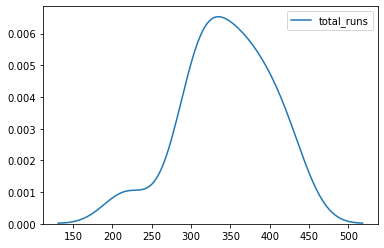

In [257]:
sns.kdeplot(runs_scored_per_match["total_runs"])

In [258]:
runs_scored_per_match.describe().T

,count,mean,std,min,25%,50%,75%,max
total_runs,14.0,344.857143,55.887053,218.0,315.0,345.5,377.5,431.0


Text(0.5, 1.0, 'Total Runs')

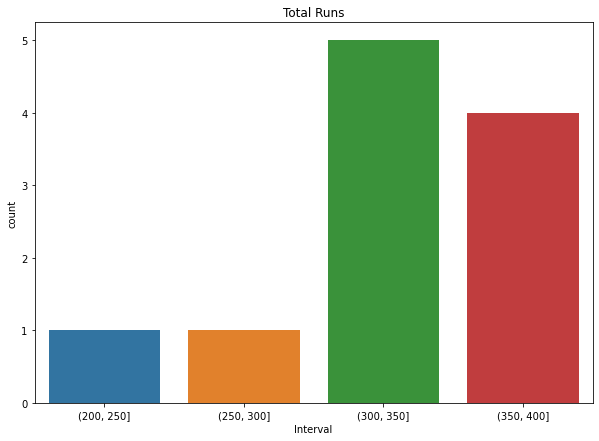

In [259]:
plt.figure(figsize=(10,7))
runs_scored_per_match["Interval"] = pd.cut(runs_scored_per_match["total_runs"],[200,250,300,350,400])
sns.countplot(runs_scored_per_match["Interval"])
plt.title("Total Runs")

In [260]:
print("Average of total runs scored in SRH VS RCB matches :",round(runs_scored_per_match["total_runs"].mean()))

Average of total runs scored in SRH VS RCB matches : 345


## Confidence Interval

In [261]:
mean = runs_scored_per_match["total_runs"].mean()
sd = runs_scored_per_match["total_runs"].std()
n = len(runs_scored_per_match)

n

14

In [262]:
tstar = 2.064
se = sd/np.sqrt(n)
se

14.936443058512571

In [263]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our Confidence Interval for Total runs that can be scored in this match :{}".format((lcb, ucb)))

So , our Confidence Interval for Total runs that can be scored in this match :(314.0, 376.0)


From all the above analysis we can see that the frecuency of total score going more then 340 is little bit high and also the average score is around 345. So based on all the above analysis we can predict that in this match also the total score is expected to go above 340+.

## Balls less/more RCB will take to reach a team score of 30 after they score their 50 runs

- RCB

In [264]:
rcb = RCB_SRH[RCB_SRH["batting_team"]=="Royal Challengers Bangalore"]

In [265]:
rcb_runs = rcb.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by RCB overall :")

rcb_runs

Runs scored by RCB overall :


,total_runs
match_id,
1,172
388,145
432,162
481,158
503,160
525,166
568,83
580,227
603,179


- Balls taken by RCB to score next 30 runs after scoring total of 50

In [266]:
balls = []
for value in rcb.groupby("match_id"):
    count = 0
    runs = 0
    run = 0
    d = list(value[1]["total_runs"])
#    print(d)
#    print(" ")
    for i in d:
        runs = runs+i
        if runs>50:
            if run <30:
                run = run+i
                count = count+1
#                print(run)
            
    balls.append(count)
    
balls

[22, 23, 16, 26, 10, 24, 13, 21, 17, 22, 32, 18, 18, 26]

In [267]:
rcb_runs["balls for 30(RCB)"] = balls

rcb_runs.reset_index(inplace = True)

print("Balls taken by RCB for 30 team's run after scoring 50 team's run :")
rcb_runs

Balls taken by RCB for 30 team's run after scoring 50 team's run :


,match_id,total_runs,balls for 30(RCB)
0,1,172,22
1,388,145,23
2,432,162,16
3,481,158,26
4,503,160,10
5,525,166,24
6,568,83,13
7,580,227,21
8,603,179,17
9,636,200,22


- SRH

In [268]:
srh = RCB_SRH[RCB_SRH["batting_team"]=="Sunrisers Hyderabad"]

In [269]:
srh_runs = srh.groupby(["match_id"]).agg({ "total_runs":"sum"})

print("Runs scored by SRH overall :")

srh_runs

Runs scored by SRH overall :


,total_runs
match_id,
1,207
388,150
432,161
481,155
503,161
525,172
568,135
580,182
603,194


In [270]:
balls = []
for value in srh.groupby("match_id"):
    count = 0
    runs = 0
    run = 0
    d = list(value[1]["total_runs"])
#    print(d)
#    print(" ")
    for i in d:
        runs = runs+i
        if runs>50:
            if run <30:
                run = run+i
                count = count+1
#                print(run)
            
    balls.append(count)
    
balls

[19, 29, 31, 26, 30, 19, 13, 16, 21, 20, 25, 23, 22, 35]

In [271]:
srh_runs["balls for 30(SRH)"] = balls

srh_runs.reset_index(inplace = True)

print("Balls taken by SRH for 30 team's run after scoring 50 team's run :")
srh_runs

Balls taken by SRH for 30 team's run after scoring 50 team's run :


,match_id,total_runs,balls for 30(SRH)
0,1,207,19
1,388,150,29
2,432,161,31
3,481,155,26
4,503,161,30
5,525,172,19
6,568,135,13
7,580,182,16
8,603,194,21
9,636,208,20


In [272]:
final = pd.merge(rcb_runs,srh_runs,on = "match_id",how = "inner")
final = final.drop(["total_runs_x","total_runs_y"],axis = 1)
final

,match_id,balls for 30(RCB),balls for 30(SRH)
0,1,22,19
1,388,23,29
2,432,16,31
3,481,26,26
4,503,10,30
5,525,24,19
6,568,13,13
7,580,21,16
8,603,17,21
9,636,22,20


In [273]:
final["DIFF"] = abs(final["balls for 30(SRH)"]-final["balls for 30(RCB)"])

print("DIFFERENCE :")
final

DIFFERENCE :


,match_id,balls for 30(RCB),balls for 30(SRH),DIFF
0,1,22,19,3
1,388,23,29,6
2,432,16,31,15
3,481,26,26,0
4,503,10,30,20
5,525,24,19,5
6,568,13,13,0
7,580,21,16,5
8,603,17,21,4
9,636,22,20,2


In [274]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
DIFF,14.0,6.071429,5.511726,0.0,3.25,5.0,6.75,20.0


In [275]:
print("Average difference between balls :{}".format(round(final["DIFF"].mean())))

Average difference between balls :6


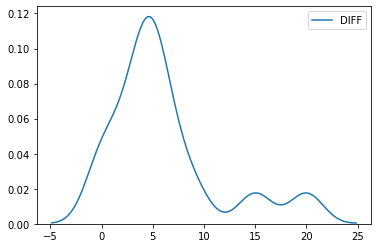

In [276]:
sns.kdeplot(final["DIFF"])

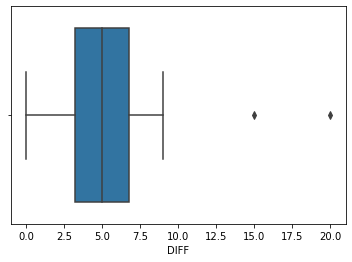

In [277]:
sns.boxplot(final["DIFF"])

Text(0.5, 1.0, 'Difference')

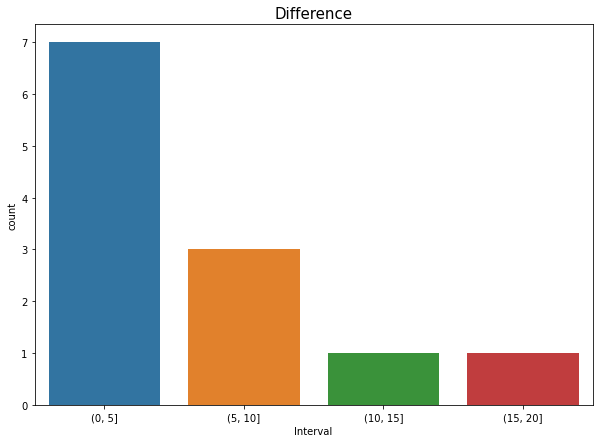

In [278]:
plt.figure(figsize=(10,7))
final["Interval"] = pd.cut(final["DIFF"],[0,5,10,15,20])
sns.countplot(final["Interval"])
plt.title("Difference",fontsize = 15)

From the above plot we can see that majority of times the difference lies between 0-5 balls. Also the average is at around 5-6 balls. So based on their past records we can predict that in this match also , the difference is expected to be between 0-8 balls. 

## How many wickets more/less will SRH loose as campared to RCB in powerplay

In [279]:
overs = RCB_SRH[RCB_SRH["over"]<7]

In [280]:
overs.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

- RCB

In [281]:
rcb = over[over["batting_team"]=="Royal Challengers Bangalore"]

In [282]:
wicket1 = pd.DataFrame(rcb.groupby(["match_id"])["player_dismissed"].count())

wicket1.columns = ["RCB wickets"]

wicket1.reset_index(inplace = True)

print("Wickets lost by RCB in powerplay :")

wicket1

Wickets lost by RCB in powerplay :


,match_id,RCB wickets
0,1,1
1,388,2
2,432,1
3,481,2
4,503,2
5,525,1
6,568,4
7,580,1
8,603,1
9,636,0


- SRH

In [283]:
srh = over[over["batting_team"]=="Sunrisers Hyderabad"]

In [284]:
wicket2 = pd.DataFrame(srh.groupby(["match_id"])["player_dismissed"].count())

wicket2.columns = ["SRH wickets"]

wicket2.reset_index(inplace = True)

print("Wickets lost by SRH in powerplay :")

wicket2

Wickets lost by SRH in powerplay :


,match_id,SRH wickets
0,1,1
1,388,2
2,432,1
3,481,2
4,503,0
5,525,0
6,568,1
7,580,1
8,603,1
9,636,0


In [285]:
final = pd.merge(wicket1,wicket2,on = "match_id",how = "inner")

final

,match_id,RCB wickets,SRH wickets
0,1,1,1
1,388,2,2
2,432,1,1
3,481,2,2
4,503,2,0
5,525,1,0
6,568,4,1
7,580,1,1
8,603,1,1
9,636,0,0


In [286]:
final["DIFF"] = abs(final["RCB wickets"]-final["SRH wickets"])

final

,match_id,RCB wickets,SRH wickets,DIFF
0,1,1,1,0
1,388,2,2,0
2,432,1,1,0
3,481,2,2,0
4,503,2,0,2
5,525,1,0,1
6,568,4,1,3
7,580,1,1,0
8,603,1,1,0
9,636,0,0,0


In [287]:
final.DIFF.value_counts()

0    7
1    3
3    2
2    2
Name: DIFF, dtype: int64

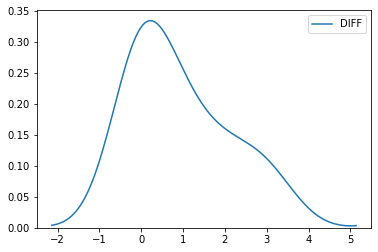

In [288]:
sns.kdeplot(final["DIFF"])

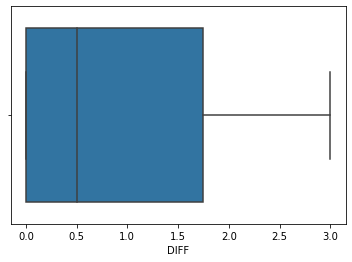

In [289]:
sns.boxplot(final["DIFF"])


In [290]:
print("Average difference between wickets lost in first 6 overs :{}".format(round(final["DIFF"].mean())))

Average difference between wickets lost in first 6 overs :1


Based on the above analysis we can see that most of the times the difference has been almost between 0-1 wicket. So in this match also we expect the difference to lie between 0-1 wickets in powerplay. 

## Dot balls in the match

In [291]:
dot_ball = RCB_SRH[RCB_SRH["total_runs"]==0]

In [292]:
dot_ball_overall = pd.DataFrame(dot_ball.groupby(["match_id"])["total_runs"].count())

dot_ball_overall.columns = ["dot balls"]

dot_ball_overall

,dot balls
match_id,
1,70
388,87
432,81
481,104
503,86
525,80
568,20
580,82
603,66


In [293]:
(dot_ball_overall["dot balls"]<80).value_counts()

False    8
True     6
Name: dot balls, dtype: int64

In [294]:
dot_ball_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,14.0,75.928571,18.878006,20.0,70.5,80.5,85.75,104.0


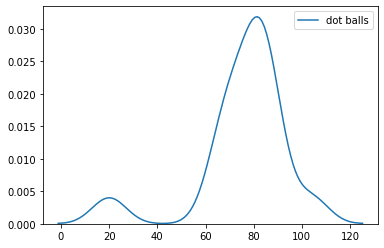

In [295]:
sns.kdeplot(dot_ball_overall["dot balls"])

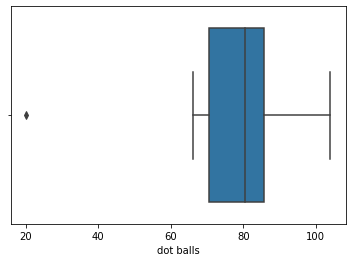

In [296]:
sns.boxplot(dot_ball_overall["dot balls"])

Text(0.5, 1.0, 'No of dot balls in RCB VS SRH')

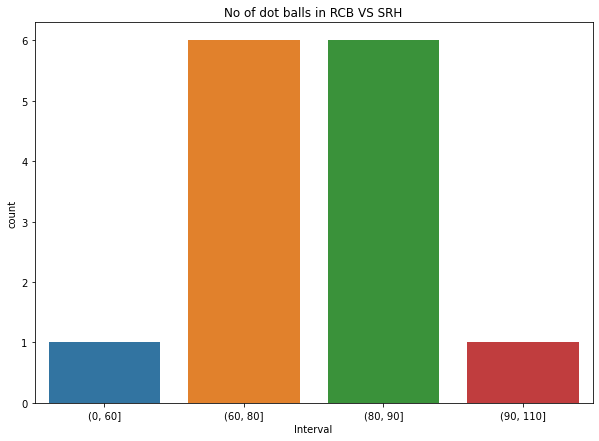

In [297]:
plt.figure(figsize=(10,7))
dot_ball_overall["Interval"] = pd.cut(dot_ball_overall["dot balls"],[0,60,80,90,110])
sns.countplot(dot_ball_overall["Interval"])
plt.title("No of dot balls in RCB VS SRH")

In [298]:
print("Average no of dot balls bowled in SRH VS RCB matches :{}".format(round(dot_ball_overall["dot balls"].mean())))

Average no of dot balls bowled in SRH VS RCB matches :76


### Inning Wise

- First Inning

In [299]:
first_dot = dot_ball[dot_ball["inning"]==1]

In [300]:
first_dot_ball = pd.DataFrame(first_dot.groupby(["match_id"])["total_runs"].count())

first_dot_ball.columns = ["dot balls"]

first_dot_ball

,dot balls
match_id,
1,26
388,50
432,39
481,46
503,43
525,51
568,11
580,35
603,36


In [301]:
first_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,14.0,36.785714,10.864045,11.0,33.5,37.5,43.0,51.0


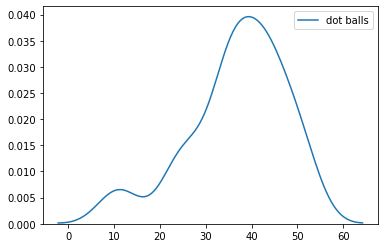

In [302]:
sns.kdeplot(first_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 1st innings')

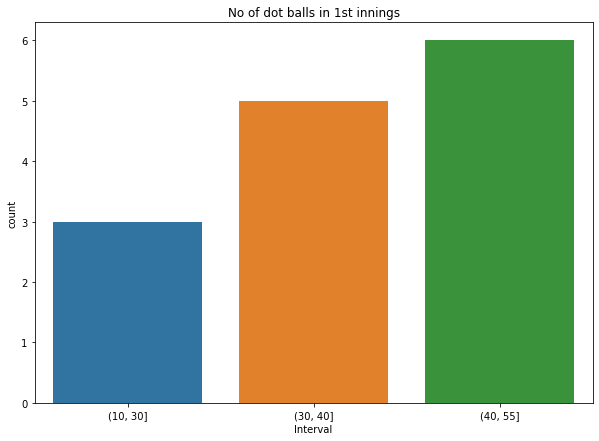

In [303]:
plt.figure(figsize=(10,7))
first_dot_ball["Interval"] = pd.cut(first_dot_ball["dot balls"],[10,30,40,55])
sns.countplot(first_dot_ball["Interval"])
plt.title("No of dot balls in 1st innings")

In [304]:
print("Average no of dot balls bowled in 1st innings :{}".format(round(first_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 1st innings :37


- 2nd Inning

In [305]:
second_dot = dot_ball[dot_ball["inning"]==2]

In [306]:
second_dot_ball = pd.DataFrame(second_dot.groupby(["match_id"])["total_runs"].count())

second_dot_ball.columns = ["dot balls"]

second_dot_ball

,dot balls
match_id,
1,44
388,37
432,42
481,58
503,43
525,29
568,9
580,47
603,30


In [307]:
second_dot_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
dot balls,14.0,39.142857,12.901146,9.0,34.0,39.5,43.75,62.0


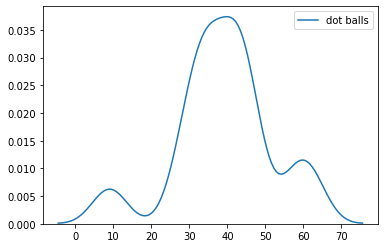

In [308]:
sns.kdeplot(second_dot_ball["dot balls"])

Text(0.5, 1.0, 'No of dot balls in 2nd innings')

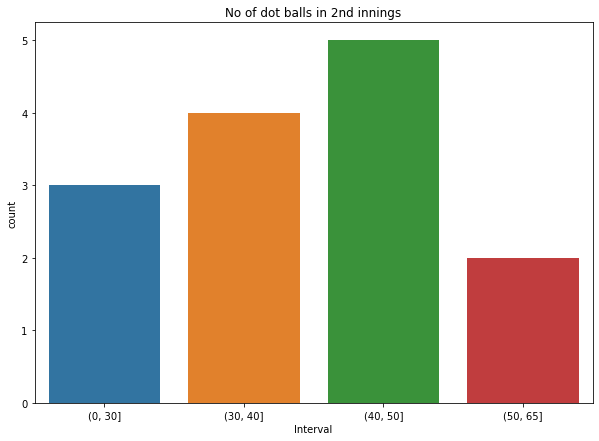

In [309]:
plt.figure(figsize=(10,7))
second_dot_ball["Interval"] = pd.cut(second_dot_ball["dot balls"],[0,30,40,50,65])
sns.countplot(second_dot_ball["Interval"])
plt.title("No of dot balls in 2nd innings")

In [310]:
print("Average no of dot balls bowled in 2nd innings :{}".format(round(second_dot_ball["dot balls"].mean())))

Average no of dot balls bowled in 2nd innings :39


### Confidence Interval

In [311]:
mean = dot_ball_overall["dot balls"].mean()
sd = dot_ball_overall["dot balls"].std()
n = len(dot_ball_overall["dot balls"])

n

14

In [312]:
tstar = 2.064
se = sd/np.sqrt(n)
se

5.045359401605179

In [313]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)


print("95% Confidence Interval for the dot balls than can be bowled in RCB VS SRH match :{}".format((lcb, ucb)))

95% Confidence Interval for the dot balls than can be bowled in RCB VS SRH match :(66.0, 86.0)


So based on all the above analysis both match-wise and inning-wise, we can predict that in this match the dot balls are expected to be 60+.